In [22]:
# Clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import vq, kmeans, whiten

# Data Manipulation
import matplotlib.pyplot as plt, numpy as np

# Data Visualization
import seaborn as sns, pandas as pd

# Performance check
import timeit

In [33]:
# Generate Random Data
x_coord = whiten(np.random.rand(50) * 10)
y_coord = whiten(np.random.rand(50) * 10)

# Build DataFrame
df = pd.DataFrame({'x': x_coord, 'y': y_coord})
df.head()

,x,y
0,2.710556,0.936848
1,0.800152,0.072381
2,0.865354,2.862697
3,0.434525,3.097878
4,0.583190,0.553376


In [24]:
# Calculate linkage matrix with 'ward' method
distance_matrix = linkage(df, method='ward')

# Add clustered column with new label
df['hierarchy'] = fcluster(distance_matrix, 3, criterion='maxclust')

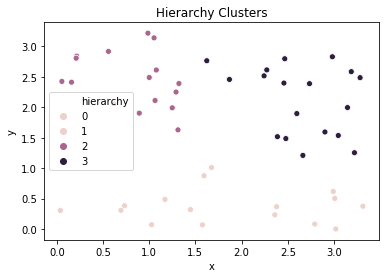

In [25]:
# Visualize Hierarchy Clusters
sns.scatterplot(x='x', y='y', hue='hierarchy', data=df)
plt.title('Hierarchy Clusters')
plt.show()

In [32]:
# Calculate Centroids with kmeans
centroids, _ = kmeans(df, 3)

# Add label to DataFrame
df['kmeans'], _ = vq(df, centroids)

# mean centroids in k-means
df[['x', 'y', 'kmeans']].groupby('kmeans').mean()

,x,y
kmeans,,
0,1.379731,2.632391
1,3.153851,2.265350
2,1.995056,0.601625


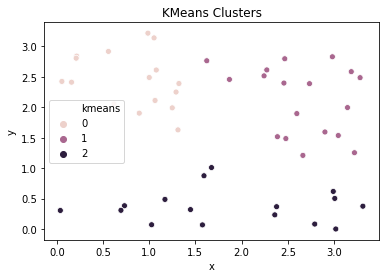

In [27]:
# Visualize Kmeans Clusters
sns.scatterplot(x='x', y='y', hue='kmeans', data=df)
plt.title('KMeans Clusters')
plt.show()


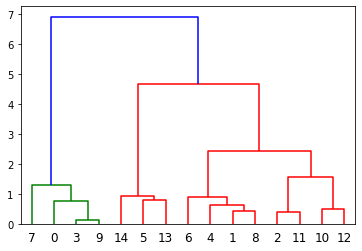

In [28]:
# Dendrograms are used visualizations to predict optimal number of clusters
distance_matrix = linkage(df.head(15), method='ward', metric='euclidean')
dn = dendrogram(distance_matrix)
plt.show()